## Markov Chains

## Definition

Mathematical systems that hop from one state to another, this system is an stochastic process as it is based on conditional probabilities that change on a temporal matter

Each set state is temporally fixed but it can change from one time to the next, moreover, the outcome of one trial could affect the outcome of the next trial.


In [ ]:
physical exercise training method A is used only 5% of the time

a person using method A will stay with this method 85% of the time

a person not using method A will switch to method A about 65% time

A = Method A
A'= Method B'










Transition Matrix


P(A) = ?

So = [0.05 0.95]














s1 = [0.66 0.34]










In [1]:
(0.05*0.85)+(0.95*0.65)


[1] 0.66

In [2]:
tran = matrix(c(0.85,0.15,0.65,0.35),ncol = 2,nrow = 2, byrow = T)
tran

0.85,0.15
0.65,0.35


In [11]:
s0 = c(0.05,0.95)
s0 * tran
s1 = colSums(s0 * tran)
s2 = colSums(s1 * tran)
s3 = colSums(s2 * tran)
s4 = colSums(s3 * tran)
s5 = colSums(s4 * tran)
s6 = colSums(s5 * tran)
s4
s5
s6
s7  = colSums(s6 * tran)
s7

0.0425,0.0075
0.6175,0.3325


[1] 0.81128 0.18872

[1] 0.812256 0.187744

[1] 0.8124512 0.1875488

[1] 0.8124902 0.1875098

### State space

In markov chains you use multiple states of one or multiple variable, lets define the state space as S 

S = {s1, s2, s3}

Examples of state spaces

Wheather={rain, sunny, cloudy, storm, snow, etc...}

mood={happy, sad, angry, etc...}

nucleotide frequency = {a,g,c,t}

page rank (Google) ={search categories....}

### Transition

The state space then moves from one event to the next, we define this as an *step*

The chain will move from $s_i$ to $s_j$ with a probability $p_ij$, independently to which state the chain was before.

This probability is called a *transition probability*

We define an initial starting state as our start point from there the chain moves stochastically to the subsequent steps.

Example (taken from Introduction to Probability Grinstead and Snell):

In the Land of Oz weather is very hard to predict. They never have two nice days in a row. If they have a nice day, they are just as likely to have snow as rain the next day. If they have snow or rain, they have an even chance of having the same the next day. If there is change from snow or rain, only half of the time is this a change to a nice day. 

Based on this information lets form a Markov chain: 

- a. lets define the state space
    - S = {Rain, Nice, Snow} or
    - S = {R, N, S}


- b. Create a transition matrix using the transition probabilities

    - From the above information we determine the transition probabilities. These are most conveniently represented in a square array as a **transition matrix**



## Transition matrix

\begin{array}{cc}
&&& R & N &  S \\
\end{array}
\begin{equation*}
P  =  \begin{array}{cc}
R \\
N \\
S \\
\end{array}
\begin{pmatrix}
\frac{1}{2}       & \frac{1}{4} & \frac{1}{4}  \\
\frac{1}{2}       & 0 & \frac{1}{2}   \\
\frac{1}{4}       & \frac{1}{4} & \frac{1}{2} 
\end{pmatrix}
\end{equation*}

The left side of the matrix represent the present (current) and the top represent the probability to the next steps: for example
the first row shows the probabilities for different events following Rain


### Initial state (probability vector):

We can generate a vector of probabilities that represent the initial state $S_0$, for example if we want to state that today we are having a nice day, we can generate a vector in the form

$S_0$ = [0,1,0] where

${\sum_{j\in S} P_j = 1}$

We can also represent our initial state the initial probabilities for today's weather, if we want to represent that there is a 50% for a nice day and equal changes of rain or snow we can represent our initial state as:

$S_0$ = [0.25,0,50,0.25]


### Chain prediction

Once we have the initial state and our transition matrix, then we can ask the long term behavior for each state based on our initial probability vector.

Let P be the transition matrix of a Markov chain, and let u be the probability vector which represents the starting distribution. Then the probability that the chain is in state $s_i$ after n steps is the ith entry in the vector

Eq. 1                                         $(u)^n = uP^n$                  

Example,

From our previous example, lets use our initial state $S_0$ = [0.25,0,50,0.25]

using our equation 1 we want to ask what are the distribution of probabilities after 3 days 

$uP^3 = [0.25,0.50,0.25] * \begin{pmatrix}
0.5       & 0.25 & 0.25  \\
0.5       & 0 & 0.5   \\
0.25       & 0.25 & 0.5 
\end{pmatrix}^3$

$$ uP^3 = [0.40625,	0.1875,	0.40625] $$

### There obviously packages for markov chains in R

#### e.g. package markovchain [https://cran.r-project.org/web/packages/markovchain/vignettes/an_introduction_to_markovchain_package.pdf](https://cran.r-project.org/web/packages/markovchain/vignettes/an_introduction_to_markovchain_package.pdf)

In [18]:
library(markovchain)

#Lets define our states
weatherStates <- c("Rain", "Nice", "Snow")
byRow <- TRUE

##lets create the transitional matrix
weatherMatrix <- matrix(data = c(0.5, 0.25, 0.25,
                                 0.5, 0.0, 0.5,
                                 0.25, 0.25, 0.5), byrow = byRow, nrow = 3,
                        dimnames = list(weatherStates, weatherStates))

##make the matrix a markovchain class
mcWeather <- new("markovchain", states = weatherStates, byrow = byRow,
                 transitionMatrix = weatherMatrix, name = "Weather")

##define the initial state
initialState <- c(1, 0, 0)



In [13]:
weatherMatrix

,Rain,Nice,Snow
Rain,0.50,0.25,0.25
Nice,0.50,0.00,0.50
Snow,0.25,0.25,0.50


In [14]:
mcWeather

Weather 
 A  3 - dimensional discrete Markov Chain defined by the following states: 
 Rain, Nice, Snow 
 The transition matrix  (by rows)  is defined as follows: 
     Rain Nice Snow
Rain 0.50 0.25 0.25
Nice 0.50 0.00 0.50
Snow 0.25 0.25 0.50


In [15]:
##State of probabilities after 3 days
mcWeather ^3

Weather^3 
 A  3 - dimensional discrete Markov Chain defined by the following states: 
 Rain, Nice, Snow 
 The transition matrix  (by rows)  is defined as follows: 
         Rain     Nice     Snow
Rain 0.406250 0.203125 0.390625
Nice 0.406250 0.187500 0.406250
Snow 0.390625 0.203125 0.406250


In [23]:
after3Days <- initialState * (mcWeather^9)
after3Days

Rain,Nice,Snow
0.4000015,0.2000008,0.3999977


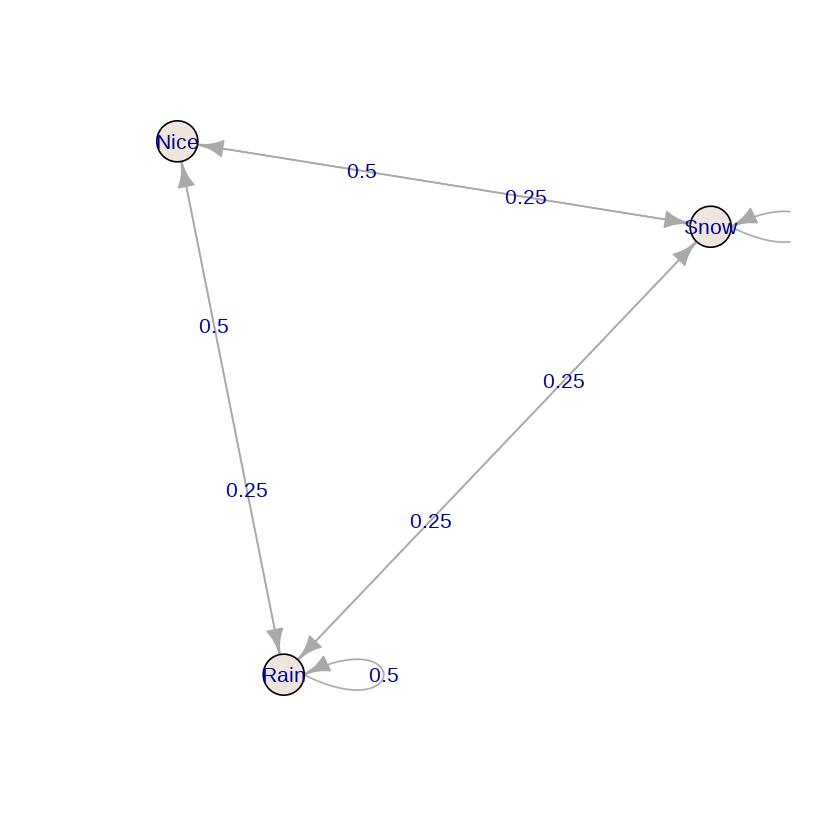

In [17]:
plot(mcWeather)

Multiple applications msm, mcmc, mcmcmc, hidden markov chains

### Random Walks

Drunkard's walk example

Consider a completely drunk person who walks along a street. being drunk, he has no sense of direction. So he may move forwards with equal probability that he moves backwards.

The person walks along a four-block stretch of Park Avenue. If he is at corner 1, 2, or 3, then he walks to the left or right with equal probability. He continues until he reaches corner 4, which is a bar, or corner 0, which is his home. If he reaches either home or the bar, he stays there.

![title](drunkard’s_walk.png)

![title](diagram.png)

What is the Transition Matrix?

$$P =
\begin{pmatrix}
0 & 0 & 0 & 0 & 0  \\
0 & 0 & 0 & 0 & 0  \\
0 & 0 & 0 & 0 & 0  \\
0 & 0 & 0 & 0 & 0  \\
0 & 0 & 0 & 0 & 0  
\end{pmatrix}$$

#### Lets create a function that allows us to simulate this random walk based on the conditional probabilities from the transition matrix

In [8]:
P=matrix(0,5,5)
P[1,] = c(1,0,0,0,0)
P[2,] = c(0.5,0,0.5,0,0)
P[3,] = c(0,0.5,0,0.5,0)
P[4,] = c(0,0,0.5,0,0.5)
P[5,] = c(0,0,0,0,1)
#P

markov = function(N,Po,P){
    P0 = c(0.0005,0.4,0.199,0.4,0.0005)
    P = P*P0
    X=matrix(0,1,N)
    a = 3
    X[1] = a
    for (i in 2:N){
        a=sample(c(1:5),1,replace=T,P[a,])
        X[i]=a
    }
    b = as.vector(X)
    return(b)
}

In [13]:
P0 = c(0.0005,0.4,0.199,0.4,0.0005)
markov(10,PO,P)

[1] 3 4 5 5 5 5 5 5 5 5

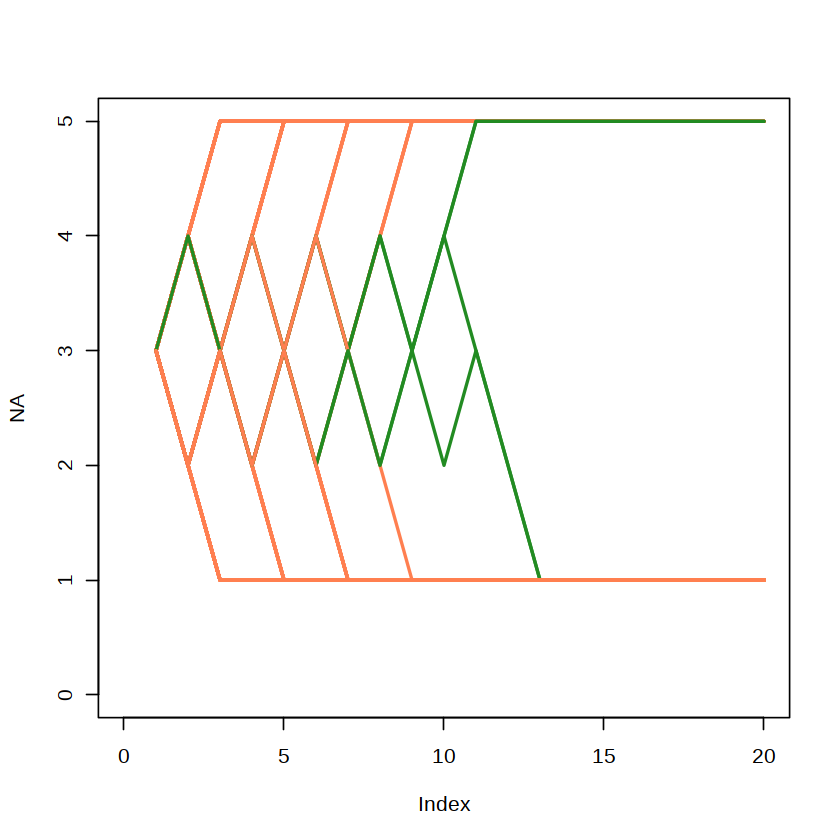

In [15]:
N =20
plot(NA, xlim=c(0,20), ylim=c(0,5))#empty plot
datas = matrix(ncol = 20, nrow = 100)
for (i in 1:100){
  datas[i,] = markov(N,P0,P)
  condir = datas[i,]
  col = (condir[10]==1 | condir[10]==5)
  lines(condir, lwd=2,col = ifelse(col, "coral","forestgreen"))
}

In [17]:
table(datas)

datas
  1   2   3   4   5 
852 101 191  90 766 

Exercise:

Another simpler example of a random walk is a one-dimensional random walk. first we place a marker at zero (our initial state), we flip a coin, if it lands on heads, the marker is moved one unit to the right (1), if it lands on tails it is moved one unit to the left(-1).

1. Generate a function that randomly draws from our initial state and populates a vector with the different transitions.
2. Generate a plot that shows 500 independent one-dimensional walks, differentiating walks that end above 0 or below 0. 